#Importing Libraries and loading the dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train/255.0

x_test = x_test/255.0

#Defining  the DL models:

##1 hidden layer Fully Connected Neural Network

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Model has about 4,00,000 parameters. Now compiling the model and training it

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,batch_size=512, epochs=40, validation_split=0.05)

Epoch 1/40
112/112 [==============================] - 3s 7ms/step - loss: 0.6193 - accuracy: 0.7884 - val_loss: 0.4283 - val_accuracy: 0.8540
Epoch 2/40
112/112 [==============================] - 0s 4ms/step - loss: 0.4209 - accuracy: 0.8539 - val_loss: 0.4140 - val_accuracy: 0.8500
Epoch 3/40
112/112 [==============================] - 1s 4ms/step - loss: 0.3742 - accuracy: 0.8696 - val_loss: 0.3613 - val_accuracy: 0.8700
Epoch 4/40
112/112 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8741 - val_loss: 0.3798 - val_accuracy: 0.8633
Epoch 5/40
112/112 [==============================] - 1s 4ms/step - loss: 0.3303 - accuracy: 0.8820 - val_loss: 0.3319 - val_accuracy: 0.8783
Epoch 6/40
112/112 [==============================] - 1s 5ms/step - loss: 0.3103 - accuracy: 0.8889 - val_loss: 0.3273 - val_accuracy: 0.8853
Epoch 7/40
112/112 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8941 - val_loss: 0.3267 - val_accuracy: 0.8810
Epoch 

Plotting Accuracy vs Epochs (Validation dataset is 5% of train dataset)

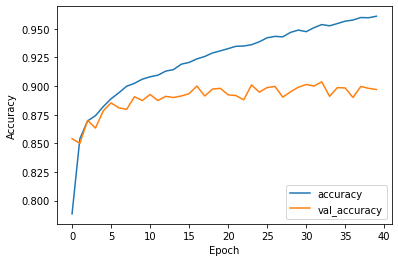

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

##5 hidden layer Fully connected Neural Network

In [11]:
model_5layer = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [12]:
model_5layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

Model has over 5,00,000 parameters. Now, we compile it and train it.

In [13]:
model_5layer.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [14]:
history_5layer = model_5layer.fit(x_train, y_train,batch_size=512, epochs=40, validation_split=0.05)

Epoch 1/40
112/112 [==============================] - 1s 8ms/step - loss: 1.1955 - accuracy: 0.6753 - val_loss: 0.7383 - val_accuracy: 0.8193
Epoch 2/40
112/112 [==============================] - 1s 6ms/step - loss: 0.6192 - accuracy: 0.8382 - val_loss: 0.5541 - val_accuracy: 0.8380
Epoch 3/40
112/112 [==============================] - 1s 6ms/step - loss: 0.4926 - accuracy: 0.8573 - val_loss: 0.4503 - val_accuracy: 0.8617
Epoch 4/40
112/112 [==============================] - 1s 6ms/step - loss: 0.4097 - accuracy: 0.8746 - val_loss: 0.4474 - val_accuracy: 0.8567
Epoch 5/40
112/112 [==============================] - 1s 6ms/step - loss: 0.3736 - accuracy: 0.8821 - val_loss: 0.3671 - val_accuracy: 0.8833
Epoch 6/40
112/112 [==============================] - 1s 6ms/step - loss: 0.3406 - accuracy: 0.8886 - val_loss: 0.3582 - val_accuracy: 0.8767
Epoch 7/40
112/112 [==============================] - 1s 6ms/step - loss: 0.3191 - accuracy: 0.8939 - val_loss: 0.3398 - val_accuracy: 0.8850
Epoch 

Plotting Accuracy vs epochs, Validation dataset is 5%

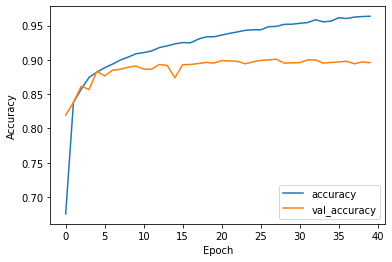

In [15]:
plt.plot(history_5layer.history['accuracy'], label='accuracy')
plt.plot(history_5layer.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#CNN Model

In [16]:
model_CNN = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28,28)),                         
    tf.keras.layers.Conv2D(32, (3, 3),  padding="same",activation = 'relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [17]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

Again over 5,00,000 parameters. Compiling and Training:

In [18]:
model_CNN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
history_CNN = model_CNN.fit(x_train, y_train,batch_size=512, epochs=40, validation_split=0.05)

Epoch 1/40
112/112 [==============================] - 29s 24ms/step - loss: 1.2345 - accuracy: 0.6513 - val_loss: 0.8292 - val_accuracy: 0.7910
Epoch 2/40
112/112 [==============================] - 2s 20ms/step - loss: 0.7292 - accuracy: 0.7985 - val_loss: 0.6111 - val_accuracy: 0.8260
Epoch 3/40
112/112 [==============================] - 2s 20ms/step - loss: 0.5414 - accuracy: 0.8459 - val_loss: 0.5093 - val_accuracy: 0.8480
Epoch 4/40
112/112 [==============================] - 2s 20ms/step - loss: 0.4424 - accuracy: 0.8666 - val_loss: 0.3916 - val_accuracy: 0.8783
Epoch 5/40
112/112 [==============================] - 2s 20ms/step - loss: 0.3772 - accuracy: 0.8815 - val_loss: 0.3690 - val_accuracy: 0.8817
Epoch 6/40
112/112 [==============================] - 2s 20ms/step - loss: 0.3359 - accuracy: 0.8914 - val_loss: 0.3218 - val_accuracy: 0.8977
Epoch 7/40
112/112 [==============================] - 2s 20ms/step - loss: 0.3051 - accuracy: 0.8995 - val_loss: 0.2950 - val_accuracy: 0.904

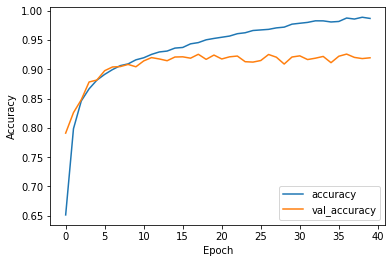

In [20]:
plt.plot(history_CNN.history['accuracy'], label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Clearly CNN model has a much higher accuracy and a much lower loss, hence it is the best model and we will use it for predictions. The validation accuracy doesn't drop, hence we aren't overfitting.

#Performance on Test Dataset:

In [21]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [22]:
model_CNN.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.9187


[0.34078842401504517, 0.9186999797821045]

The model has 91.86% accuracy on the Test dataset, similar to the ~92% we had on the validation dataset.

Now we predict a specific image of the test dataset: 

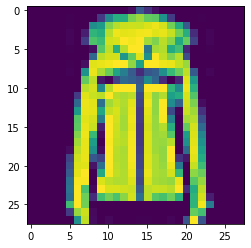

Class Predicted 4 
Original Class 4


In [23]:
index = 6500
plt.imshow(x_test[index])
plt.show()
pred = (model_CNN.predict(x_test))[index]
prediction = 0
for i in range(len(pred)):
  if (pred[i]>pred[prediction]):
      prediction = i
print('Class Predicted',prediction,'\nOriginal Class',y_test[index])

Class 4 is for the fashion item 'Coat'. We see that our model is working fairly well.

#Citations:

<p>Links:<p>


*   https://www.tensorflow.org/datasets/catalog/fashion_mnist
*   https://www.tensorflow.org/tutorials/keras/classification
*   https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html